In [38]:
import pandas as pd
import statsmodels.formula.api as smf
import plotnine as p9
import statsmodels.api as sm
import seaborn as sns

In [39]:
beauty = pd.read_csv('beauty.csv')
beauty.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [40]:
x = sm.add_constant(beauty['btystdave'])
y = beauty['courseevaluation']
model = sm.OLS(y, x)
model_ = model.fit()
predict_= model_.predict(x)
params= model_.params
model_.summary()
print(model_.summary())

                            OLS Regression Results                            
Dep. Variable:       courseevaluation   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           4.25e-05
Time:                        13:06:45   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0100      0.026    157.205      0.0

C:\Users\Mateusz\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


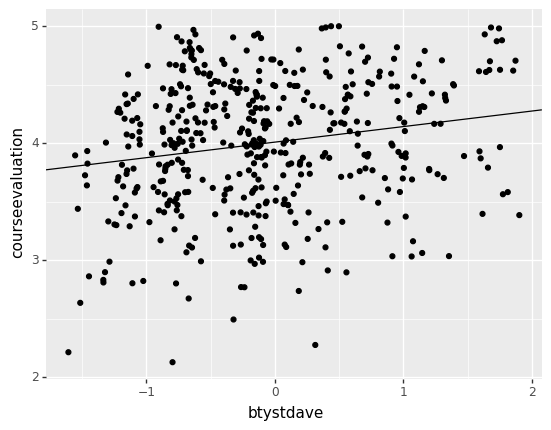

<ggplot: (-9223371838195772008)>

In [41]:
fig=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=beauty)
      +p9.geom_jitter(width=0.1)+p9.geom_abline(p9.aes(intercept=params['const'],slope=params['btystdave'])))
fig

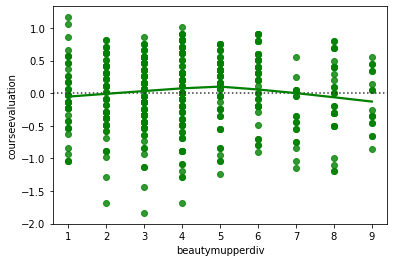

In [46]:
sns.residplot(beauty['beautymupperdiv'], beauty['courseevaluation'], lowess=True, color="g")

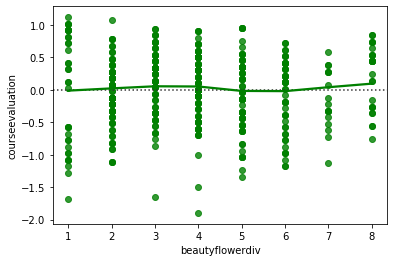

In [47]:
sns.residplot(beauty['beautyflowerdiv'], beauty['courseevaluation'], lowess=True, color="g")

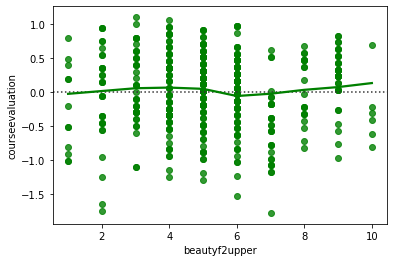

In [48]:
sns.residplot(beauty['beautyf2upper'], beauty['courseevaluation'], lowess=True, color="g")

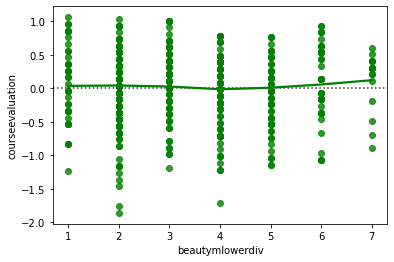

In [49]:
sns.residplot(beauty['beautymlowerdiv'], beauty['courseevaluation'], lowess=True, color="g")